Classification Task and Performance Evaluation (10 points)

Dr. Shen-Shyang Ho

October 2, 2022

• In this assignment, you will be using the dataset assigned to you in Assignment 1.

• You will be assigned three classification methods from the following classification methods: Naive Bayes Classifier, Support Vector Machine (SVM), Decision Tree, Neural Network, Random Forest, Adaboost

• Scikit-learn (https://scikit-learn.org/stable/user guide.html) will be used in this assignment

1. Convert all the images in the dataset to grayscale pixel intensity histograms. (These will be the vector representations of the images).

2. Split dataset into a training set and a test set. For each class, perform a training/test split of 80/20.

3. (Model Selection) Perform 5-fold cross-validation on the training set for k-Nearest Neighbor Classifiers such that 𝑘 = 1, 3, 5, 7 on the dataset. (2 points)

• Plot a graph (x-axis: k; y-axis: validation accuracy (%)). Which 𝑘 has the highest accuracy? (1 points)

• Use the 𝑘 value with the highest accuracy for your k-Nearest Neighbor classifier. What is the test accuracy? (1 point)

4. (Performance Comparison) Perform 5-fold cross-validation on the 4-class classification (ignore negative class) using the three assigned classification methods (if you are assigned SVM - use Gaussian kernel and C = 10). For neural network (MLPClassifier), you will use default parameters except for learning rate, you will use ’adaptive’. Plot the confusion matrices for the three approaches (clearly label the classes) using the test set (If you use code from any website, please do proper referencing. You will get 0 point for this assignment without proper referencing) (3 points)

• Based on the confusion matrices (on the test set), which do you think is the best method? Why? (1 point)

• Based on the validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.5 point)

• Computer the test accuracies for the three methods. Which is the best method? (0.5 point)

• Compute the F-measure for the three methods on the test set. Which is the best method? (1 point)

Question 1. Convert all the images in the dataset to grayscale pixel intensity histograms. (These will be the vector
representations of the images).

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

In [2]:
Dataset = pd.read_csv("C:/Users/SHARMISHA/Desktop/Data Mining -1/Programming Assignment 1/Weed-4class-67/Weed-4class-67-labels.csv")

In [3]:
Dataset

,Filename,Label,Species
0,20161207-112417-0.jpg,8,Negative
1,20161207-112431-0.jpg,8,Negative
2,20161207-112802-0.jpg,8,Negative
3,20161207-112812-0.jpg,8,Negative
4,20170128-101909-0.jpg,8,Negative
...,...,...,...
13277,20171102-123535-3.jpg,2,Parkinsonia
13278,20171102-123549-2.jpg,2,Parkinsonia
13279,20171102-123554-3.jpg,2,Parkinsonia
13280,20171102-123606-2.jpg,2,Parkinsonia


In [4]:
def grey_img(img):
    source = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return source

def hist_vector(img):
    image = cv2.imread(r"C:/Users/SHARMISHA/Desktop/Data Mining -1/Programming Assignment 1/Weed-4class-67/{}".format(img))
    gray_image1 = grey_img(image)
    hist,bins = np.histogram(gray_image1.flatten(),256,[0,256])
    return hist

vectors = []

for file in Dataset['Filename']:
    vectors.append(hist_vector(file))

In [5]:
df_vec = pd.DataFrame(vectors, columns= range(0,256))
df_vec["label"] = Dataset["Species"]
df_vec.to_csv("file1.csv")
df = pd.read_csv("file1.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,label
0,0,158,480,427,278,334,339,385,476,474,...,49,38,60,70,78,69,149,119,3,Negative
1,1,315,422,254,231,237,278,359,387,466,...,41,46,48,50,64,53,90,185,23,Negative
2,2,26,104,114,76,99,94,126,178,169,...,66,84,80,91,125,135,183,221,42,Negative
3,3,35,135,129,94,177,125,176,192,241,...,58,85,69,99,107,154,185,189,46,Negative
4,4,0,0,0,1,3,3,4,8,15,...,72,69,24,18,8,3,0,0,0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13277,13277,3,12,10,12,22,17,25,38,57,...,326,291,393,454,606,705,1172,1989,592,Parkinsonia
13278,13278,7,37,64,40,109,124,144,133,190,...,87,106,113,126,112,162,134,115,27,Parkinsonia
13279,13279,57,163,116,105,127,132,180,171,207,...,77,62,87,82,94,51,67,29,7,Parkinsonia
13280,13280,56,176,118,98,123,146,166,204,239,...,16,19,28,30,34,21,36,111,68,Parkinsonia


Question 2. Split dataset into a training set and a test set. For each class, perform a training/test split of 80/20.

In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

No. of training examples: 10625
No. of testing examples: 2657


Question 3. (Model Selection) Perform 5-fold cross-validation on the training set for k-Nearest Neighbor Classifiers
such that 𝑘 = 1, 3, 5, 7 on the dataset. (2 points)
    • Plot a graph (x-axis: k; y-axis: validation accuracy (%)). Which 𝑘 has the highest accuracy? (1 point)
    • Use the 𝑘 value with the highest accuracy for your k-Nearest Neighbor classifier. What is the test accuracy? (1 point)


In [9]:
k_values = []
scores = []

def KNNClassifier():
    for k in (1,3,5,7):
        classifier = KNeighborsClassifier(n_neighbors=k)
        result = cross_val_score(classifier, X, Y, cv = 5, scoring='accuracy')
        k_values.append(k)
        scores.append(np.mean(result))
    return scores, k_values
KNNClassifier()

([0.894587949086523,
  0.8985790263046919,
  0.9006873750175712,
  0.9003862835610412],
 [1, 3, 5, 7])

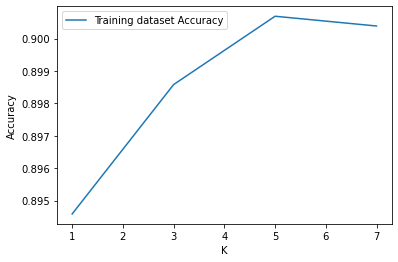

In [10]:
plt.plot(k_values, scores, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## K = 5 has highest accuracy


As the above graph shown K=5 is having highest accuracy.

In [11]:
Model_Classifier = KNeighborsClassifier(n_neighbors=5)
Model_Classifier.fit(X_train, y_train)
predict = Model_Classifier.predict(X_test)
print(accuracy_score(y_test,predict))


0.9860745201354911


Question 4. (Performance Comparison) Perform 5-fold cross-validation on the 4-class classification (ignore negativeclass) 
Using the three assigned classification methods
1. Decision Tree
2. Adaboost
3. Neural Network

Plot the confusion matrices for the three approaches (clearly label the classes)using the test set 
(If you use code from any website, please do proper referencing. You will get 0 point for this assignment without proper referencing) (3 points)


### Ignoring the negative Class in the Dataset

In [12]:
Dataset_1 = df[df.label!="Negative"]
Dataset_1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,label
9106,9106,0,1,11,20,27,28,32,35,38,...,71,44,70,62,53,41,27,22,2,Siam weed
9107,9107,3,7,10,10,15,16,17,13,16,...,58,47,54,52,63,60,130,234,67,Siam weed
9108,9108,5,7,4,5,15,11,16,14,17,...,226,279,245,286,319,401,638,809,174,Siam weed
9109,9109,1,4,10,6,9,6,8,12,11,...,65,78,57,60,132,125,192,101,21,Siam weed
9110,9110,7,9,11,4,8,11,13,17,15,...,31,45,43,57,77,56,136,139,50,Siam weed


In [13]:
X_1 = Dataset_1.iloc[:,:-1]
Y_1 = Dataset_1.iloc[:,-1]

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_1, Y_1, test_size=0.2)

### Decision Tree

In [15]:
decision_tree = DecisionTreeClassifier(criterion="entropy",random_state=42)

[[186   0   1   0]
 [  0 235   0   0]
 [  0   0 193   0]
 [  0   0   0 221]]
                precision    recall  f1-score   support

   Parkinsonia       1.00      0.99      1.00       187
Prickly acacia       1.00      1.00      1.00       235
   Rubber vine       0.99      1.00      1.00       193
     Siam weed       1.00      1.00      1.00       221

      accuracy                           1.00       836
     macro avg       1.00      1.00      1.00       836
  weighted avg       1.00      1.00      1.00       836



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

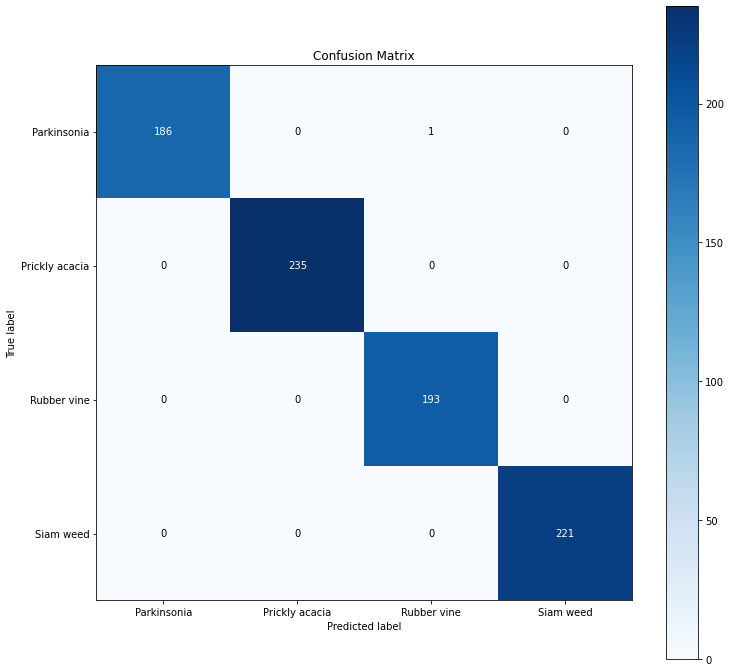

In [16]:
decision_tree.fit(X_train2, y_train2)
results_tree = decision_tree.predict(X_test2)

print(confusion_matrix(y_test2, results_tree))

print(classification_report(y_test2, results_tree))

skplt.metrics.plot_confusion_matrix(y_test2, results_tree, figsize=(12,12))

### Adaboost

In [17]:
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),n_estimators = 200)
classifier.fit(X_train2, y_train2)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [18]:
predictions_adaboost = classifier.predict(X_test2)

[[186   1   0   0]
 [  0 235   0   0]
 [  0 193   0   0]
 [  0   0   0 221]]
                precision    recall  f1-score   support

   Parkinsonia       1.00      0.99      1.00       187
Prickly acacia       0.55      1.00      0.71       235
   Rubber vine       0.00      0.00      0.00       193
     Siam weed       1.00      1.00      1.00       221

      accuracy                           0.77       836
     macro avg       0.64      0.75      0.68       836
  weighted avg       0.64      0.77      0.69       836



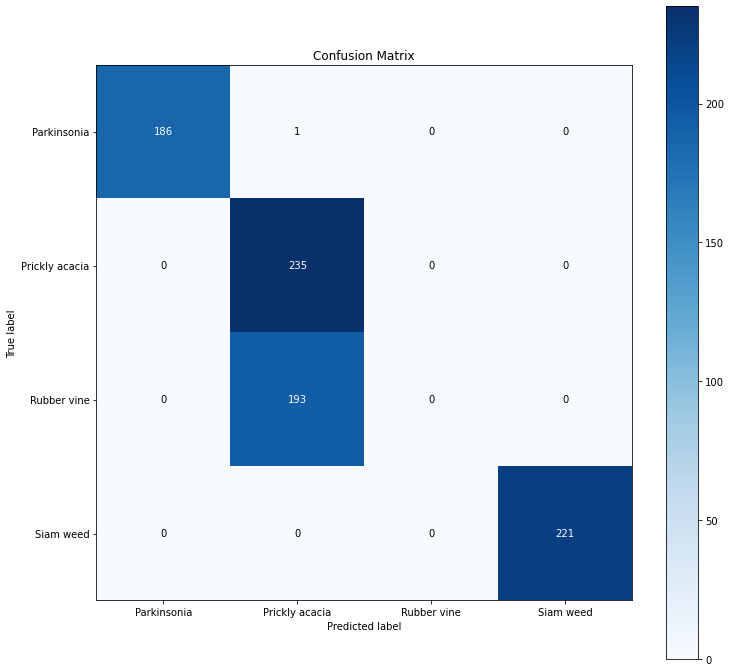

In [19]:
print(confusion_matrix(y_test2, predictions_adaboost))
skplt.metrics.plot_confusion_matrix(y_test2, predictions_adaboost, figsize=(12,12))
print(classification_report(y_test2, predictions_adaboost))

### Neural Network

                precision    recall  f1-score   support

   Parkinsonia       0.99      0.96      0.97       187
Prickly acacia       0.96      0.76      0.85       235
   Rubber vine       0.77      0.97      0.86       193
     Siam weed       0.96      0.98      0.97       221

      accuracy                           0.91       836
     macro avg       0.92      0.92      0.91       836
  weighted avg       0.92      0.91      0.91       836



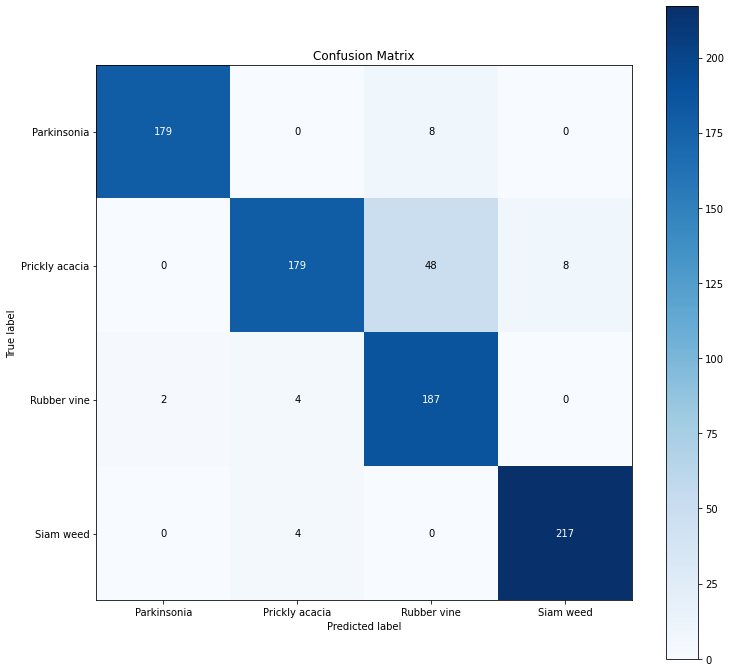

In [20]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train2, y_train2)
clf.predict(X_test2)
predictions = clf.predict(X_test2)
confusion_matrix(y_test2, predictions)
skplt.metrics.plot_confusion_matrix(y_test2, predictions, figsize=(12,12))

print(classification_report(y_test2, predictions))

Based on the confusion matrices (on the test set), which do you think is the best method? Why? (1 point)
Based on the validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.5 point)
Computer the test accuracies for the three methods. Which is the best method? (0.5 point)
Compute the F-measure for the three methods on the test set. Which is the best method? (1 point)

In [21]:
validation_4class = []

#NN
nn_scores = cross_val_score(clf, X_train2, y_train2, cv=5)
nn_validation_4class = np.mean(nn_scores)
validation_4class.append(nn_validation_4class*100)
print("Neural Network Validation Accuracy = ", nn_validation_4class)

#adaboost
adaboost_scores = cross_val_score(classifier, X_train2 ,y_train2, cv=5)
ada_validation_4class = np.mean(adaboost_scores)
validation_4class.append(ada_validation_4class*100)
print("AdaBoost validation Accuracy = ", ada_validation_4class)

#decession tree
dtree_scores = cross_val_score(decision_tree, X_train2, y_train2, cv=5)
dtree_validation_4class = np.mean(dtree_scores)
validation_4class.append(dtree_validation_4class*100)
print("decisiontree validation Accuracy = ", dtree_validation_4class)

Neural Network Validation Accuracy =  0.8682634730538922
AdaBoost validation Accuracy =  0.755688622754491
decisiontree validation Accuracy =  0.9994011976047904


In [22]:
# F1 Score

nn_f1 = f1_score(y_test2, predictions, average = 'weighted')
print("Neural Network:", nn_f1)

adaboost_f1 = f1_score(y_test2, predictions_adaboost, average = 'weighted')
print("AdaBoost :", adaboost_f1)

dtree_f1 = f1_score(y_test2, results_tree, average = 'weighted')
print("DecisionTree :", dtree_f1)

Neural Network: 0.9113487145515332
AdaBoost : 0.686410312156949
DecisionTree : 0.9988037697453234


In [23]:
# Accuracy Score

nn_accuracy_score = accuracy_score(y_test2, predictions)
print("Neural Network:", nn_accuracy_score)

adaboost_accuracy=accuracy_score(y_test2, predictions_adaboost)
print("AdaBoost :", adaboost_accuracy)

dtree_accuracy=accuracy_score(y_test2, results_tree)
print("DecisionTree :", dtree_accuracy)

Neural Network: 0.9114832535885168
AdaBoost : 0.7679425837320574
DecisionTree : 0.9988038277511961


#### Based on the confusion matrices (on the test set), which do you think is the best method? Why? (1 point)

Based on the Confusion Matrices, we can see that Neural Network(MLP Classifier) doea a much better job of classifying each catefory than the other two as confusion matrix compares the actual values with respect to predicted values.


#### Based on the validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.5 point)

Based on the 5 fold validation accuracies, we can see that Decision Tree is having highest validation accuracy compared to other algorithms.

#### Computer the test accuracies for the three methods. Which is the best method? (0.5 point)

Based on Test Accuracies, we can see that Decision Tree is having highest test accuracy compared to the others so, it is the best method.

#### Compute the F-measure for the three methods on the test set. Which is the best method? (1 point)

Based on F-measure, we can see that Decision Tree(MLP Classifier) is having highest F1_score so, it is the best method to implement.

### Overall, comparably Decision tree is the best classifier for the dataset.

References:
    
    https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
    https://obiiirehman.wordpress.com/2017/05/12/knn-classifier-cross-validation/
    https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    https://www.kdnuggets.com/2022/10/implementing-adaboost-scikitlearn.html